## 파이썬 머신러닝
# 교차 검증, 그리드 서치, 오차 행렬

### 교차 검증 (Cross Validation)
- 이제 까지 머신러닝을 적용한 결과를 검증하기 위해서, train_test_split() 함수를 사용하여 훈련세트와 테스트 세트를 분리하였다.
- train_test_split() 함수는 랜덤하게 샘플을 선정하므로 실행할 때마다 다른 결과를 얻었었다.
- 교차 검증 기술은 원본 데이터를 **k 개의 구간(폴드)** 로 나눈 다음, 차례 대로 한개의 구간을 테스트 세트로 놓고 k 번의 결과를 도출하는 것이다.
- 교과서 307쪽 그림 참조
- 교차 검증을 사용하면 러신러닝 모델이 훈련 데이터에 얼마나 민감한지를 알 수 있고, 모든 데이터를 효율적으로 사용할 수 있다. 하지만 작업을 k 번 만큼 하므로 작업시간이 길어진다.
- 두 가지 중요한 옵션
    1. 구간을 나누기 전에 데이터를 섞을 것인가 (shuffle)
    2. 데이터를 나눌 때 목표값 비율 대로 샘플을 넣어 줄 것인가 (stratified)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
from sklearn.datasets import load_iris

iris = load_iris()

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

model = DecisionTreeClassifier(max_features=2)
# train_test_split(), fit()
scores = cross_val_score(model, iris.data, iris.target, cv=5) # cv=3 default

display(scores, scores.mean())

array([0.93333333, 0.96666667, 0.86666667, 0.93333333, 1.        ])

0.9400000000000001

- cross_val_score() 함수는 shuffle 을 적용하지 않고, 분류의 경우 원본 비율을 유지(stratified) 한다.
- 이러한 정책을 바꾸려면 cv 옵션에 별도의 클래스를 정의해 주어야 한다. (KFold, StratifiedKFold)

In [14]:
from sklearn.model_selection import KFold

kfold = KFold(3) # shuffle=False
scores1 = cross_val_score(LogisticRegression(), iris.data, iris.target, cv=kfold)

scores1

array([0., 0., 0.])

In [20]:
from sklearn.model_selection import KFold

kfold = KFold(10, shuffle=True)
scores1 = cross_val_score(LogisticRegression(), iris.data, iris.target, cv=kfold)

scores1

array([0.93333333, 1.        , 0.86666667, 1.        , 0.93333333,
       1.        , 0.93333333, 0.93333333, 1.        , 0.93333333])

In [15]:
help(KFold)

Help on class KFold in module sklearn.model_selection._split:

class KFold(_BaseKFold)
 |  K-Folds cross-validator
 |  
 |  Provides train/test indices to split data in train/test sets. Split
 |  dataset into k consecutive folds (without shuffling by default).
 |  
 |  Each fold is then used once as a validation while the k - 1 remaining
 |  folds form the training set.
 |  
 |  Read more in the :ref:`User Guide <cross_validation>`.
 |  
 |  Parameters
 |  ----------
 |  n_splits : int, default=3
 |      Number of folds. Must be at least 2.
 |  
 |  shuffle : boolean, optional
 |      Whether to shuffle the data before splitting into batches.
 |  
 |  random_state : int, RandomState instance or None, optional, default=None
 |      If int, random_state is the seed used by the random number generator;
 |      If RandomState instance, random_state is the random number generator;
 |      If None, the random number generator is the RandomState instance used
 |      by `np.random`. Used when

In [8]:
from sklearn.model_selection import KFold

kfold = KFold(3, shuffle=True) # shuffle=True
scores1 = cross_val_score(LogisticRegression(), iris.data, iris.target, cv=kfold)

scores1

array([0.98, 0.9 , 0.96])

In [27]:
from sklearn.model_selection import StratifiedKFold

fold = StratifiedKFold(3) # shuffle=False (default)
scores2 = cross_val_score(LogisticRegression(), iris.data, iris.target, cv=fold)

scores2

array([0.96078431, 0.92156863, 0.95833333])

In [9]:
from sklearn.model_selection import StratifiedKFold

fold = StratifiedKFold(3, shuffle=True)
scores2 = cross_val_score(LogisticRegression(), iris.data, iris.target, cv=fold)

scores2

array([0.98039216, 0.92156863, 0.97916667])

In [7]:
from sklearn.model_selection import train_test_split

In [29]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, **options)
    Split arrays or matrices into random train and test subsets
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float, int, None, optional
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to the
        complement of the train size. By default, the value is set 

### 유방암 데이터에 교차검증 적용
- k-NN, 로지스틱회귀, SVM, DecisionTree 중 스코어가 높은 모델을 결정
- 정규화와 중요옵션 고려

In [30]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

- k-NN

In [43]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(5)
scores = cross_val_score(knn, cancer.data, cancer.target, cv=5)
scores, scores.mean()

(array([0.88695652, 0.93913043, 0.9380531 , 0.94690265, 0.92920354]),
 0.9280492497114275)

In [52]:
from sklearn.neighbors import KNeighborsClassifier

X_norm = (cancer.data - cancer.data.mean(axis=0))/cancer.data.std(axis=0)

knn = KNeighborsClassifier(5)
scores = cross_val_score(knn, X_norm, cancer.target, cv=5)
scores, scores.mean()

(array([0.96521739, 0.95652174, 0.98230088, 0.95575221, 0.96460177]),
 0.9648787995382839)

- 로지스틱 회귀

In [58]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
scores = cross_val_score(lr, cancer.data, cancer.target, cv=5)
scores, scores.mean()

(array([0.93043478, 0.93913043, 0.97345133, 0.94690265, 0.96460177]),
 0.9509041939207385)

In [56]:
lr = LogisticRegression()
scores = cross_val_score(lr, X_norm, cancer.target, cv=5)
scores, scores.mean()

(array([0.9826087 , 0.97391304, 0.97345133, 0.97345133, 0.99115044]),
 0.9789149672951135)

- SVC

In [59]:
from sklearn.svm import SVC

svc = SVC()
scores = cross_val_score(svc, cancer.data, cancer.target, cv=5)
scores, scores.mean()

(array([0.62608696, 0.62608696, 0.62831858, 0.62831858, 0.62831858]),
 0.6274259330511736)

In [60]:
svc = SVC()
scores = cross_val_score(svc, X_norm, cancer.target, cv=5)
scores, scores.mean()

(array([0.97391304, 0.96521739, 1.        , 0.96460177, 0.97345133]),
 0.9754367064255483)

- 결정트리

In [86]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

#tree = DecisionTreeClassifier(max_leaf_nodes=20)
#tree = RandomForestClassifier(100)
tree = GradientBoostingClassifier()

scores = cross_val_score(tree, cancer.data, cancer.target, cv=5)
scores, scores.mean()

(array([0.93043478, 0.93043478, 0.97345133, 0.98230088, 0.98230088]),
 0.9597845325125048)

In [77]:
tree = DecisionTreeClassifier(max_depth=5)
scores = cross_val_score(tree, X_norm, cancer.target, cv=5)
scores, scores.mean()

(array([0.91304348, 0.90434783, 0.92035398, 0.92920354, 0.90265487]),
 0.9139207387456713)

### LOOCV (Leave One Out Cross Validation)
- 샘플 하나만 테스트 세트로 잡는 방법이다. 원본 데이터 갯수만큼 모델을 적용하므로 연산 비용이 아주 높다.

In [87]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
scores = cross_val_score(LogisticRegression(), iris.data, iris.target, cv=loo)

display(scores, scores.mean())

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

0.9533333333333334

### 그리드 서치 (Grid Search)
- 최적의 인자를 찾는 방법

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

params = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(SVC(), params, cv=5)
grid.fit(iris.data, iris.target)

In [7]:
print(grid.best_params_, grid.best_score_)
display(grid.cv_results_['mean_test_score'])

{'C': 1, 'gamma': 0.1} 0.98


array([0.91333333, 0.91333333, 0.91333333, 0.96      , 0.76666667,
       0.4       , 0.91333333, 0.91333333, 0.91333333, 0.96      ,
       0.76666667, 0.4       , 0.91333333, 0.91333333, 0.92      ,
       0.96      , 0.76666667, 0.4       , 0.91333333, 0.93333333,
       0.98      , 0.96666667, 0.94      , 0.6       , 0.93333333,
       0.98      , 0.98      , 0.95333333, 0.93333333, 0.60666667,
       0.98      , 0.98      , 0.96666667, 0.94      , 0.93333333,
       0.60666667])

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

params = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(SVC(), params, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [17]:
grid.score(X_test, y_test)

1.0

In [18]:
grid.best_params_

{'C': 100, 'gamma': 0.01}

In [19]:
grid.best_score_ # 훈련세트에 대한 교차검증 점수 평균

0.9732142857142857

In [20]:
grid.best_estimator_

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [8]:
result = grid.cv_results_['mean_test_score'].reshape(6,6)
result

array([[0.91333333, 0.91333333, 0.91333333, 0.96      , 0.76666667,
        0.4       ],
       [0.91333333, 0.91333333, 0.91333333, 0.96      , 0.76666667,
        0.4       ],
       [0.91333333, 0.91333333, 0.92      , 0.96      , 0.76666667,
        0.4       ],
       [0.91333333, 0.93333333, 0.98      , 0.96666667, 0.94      ,
        0.6       ],
       [0.93333333, 0.98      , 0.98      , 0.95333333, 0.93333333,
        0.60666667],
       [0.98      , 0.98      , 0.96666667, 0.94      , 0.93333333,
        0.60666667]])

([<matplotlib.axis.YTick at 0x29520f93f28>,
 <a list of 6 Text yticklabel objects>)

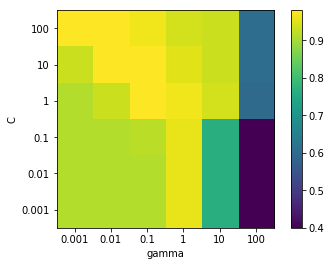

In [13]:
plt.imshow(result, origin='lower')
plt.colorbar()
plt.xlabel('gamma')
plt.ylabel('C')
plt.xticks(range(6), [0.001, 0.01, 0.1, 1, 10, 100])
plt.yticks(range(6), [0.001, 0.01, 0.1, 1, 10, 100])

### 오차 행렬 (Confusion Matrix)
- 목표값인 y 와, 예측 결과인 pred_y 값을 비교하여 결과를 평가하는 방법

In [88]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target)

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [90]:
pred_y = model.predict(X_test)

display(y_test, pred_y)

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1])

In [17]:
(y_test == pred_y).mean()

0.951048951048951

In [19]:
idx = np.where(y_test!=pred_y)[0]
idx

array([ 13,  39,  40,  64,  68, 129, 138], dtype=int64)

In [20]:
y_test[idx], pred_y[idx]

(array([1, 0, 0, 0, 1, 0, 0]), array([0, 1, 1, 1, 0, 1, 1]))

In [21]:
X_test[idx]

array([[1.785e+01, 1.323e+01, 1.146e+02, 9.921e+02, 7.838e-02, 6.217e-02,
        4.445e-02, 4.178e-02, 1.220e-01, 5.243e-02, 4.834e-01, 1.046e+00,
        3.163e+00, 5.095e+01, 4.369e-03, 8.274e-03, 1.153e-02, 7.437e-03,
        1.302e-02, 1.309e-03, 1.982e+01, 1.842e+01, 1.271e+02, 1.210e+03,
        9.862e-02, 9.976e-02, 1.048e-01, 8.341e-02, 1.783e-01, 5.871e-02],
       [1.442e+01, 1.977e+01, 9.448e+01, 6.425e+02, 9.752e-02, 1.141e-01,
        9.388e-02, 5.839e-02, 1.879e-01, 6.390e-02, 2.895e-01, 1.851e+00,
        2.376e+00, 2.685e+01, 8.005e-03, 2.895e-02, 3.321e-02, 1.424e-02,
        1.462e-02, 4.452e-03, 1.633e+01, 3.086e+01, 1.095e+02, 8.264e+02,
        1.431e-01, 3.026e-01, 3.194e-01, 1.565e-01, 2.718e-01, 9.353e-02],
       [1.277e+01, 2.247e+01, 8.172e+01, 5.063e+02, 9.055e-02, 5.761e-02,
        4.711e-02, 2.704e-02, 1.585e-01, 6.065e-02, 2.367e-01, 1.380e+00,
        1.457e+00, 1.987e+01, 7.499e-03, 1.202e-02, 2.332e-02, 8.920e-03,
        1.647e-02, 2.629e-03, 1.449e

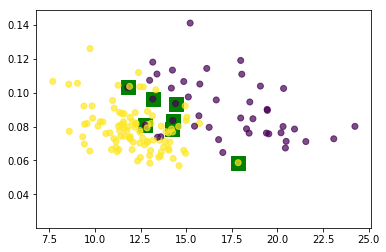

In [24]:
plt.scatter(X_test[idx][:,0], X_test[idx][:,-1], s=200, marker='s', c='green')
plt.scatter(X_test[:,0], X_test[:,-1], c=y_test, alpha=0.7)

(-100, 150)

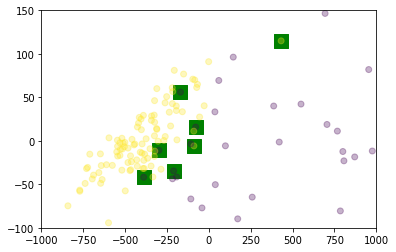

In [28]:
from sklearn.decomposition import PCA

pca = PCA(2)
pca.fit(X_train)
X_pca = pca.transform(X_test)

plt.scatter(X_pca[idx][:,0], X_pca[idx][:,-1], s=200, marker='s', c='green')
plt.scatter(X_pca[:,0], X_pca[:,-1], c=y_test, alpha=0.3)
plt.xlim(-1000,1000)
plt.ylim(-100, 150)

In [91]:
np.bincount(y_test)

array([54, 89], dtype=int64)

In [92]:
np.bincount(pred_y) # 양성으로 예측한 것은 90개

array([52, 91], dtype=int64)

In [99]:
np.where((y_test==0) & (pred_y==0)) # 49

(array([  7,   8,  10,  12,  16,  17,  26,  28,  30,  33,  34,  35,  39,
         40,  43,  44,  47,  49,  52,  58,  59,  64,  66,  69,  70,  71,
         72,  73,  75,  79,  80,  82,  84,  90,  92,  97,  98,  99, 101,
        102, 106, 110, 113, 117, 122, 123, 128, 134, 135], dtype=int64),)

In [97]:
np.where((y_test==0) & (pred_y==1)) # 5

(array([ 13,  24, 105, 109, 141], dtype=int64),)

In [98]:
np.where((y_test==1) & (pred_y==0)) # 3

(array([ 85, 125, 139], dtype=int64),)

In [101]:
np.where((y_test==1) & (pred_y==1)) # 86

(86,)

In [31]:
np.where((pred_y==1) & (y_test==0)) # &(and),|(or) => FP (False Positive)

(array([ 39,  40,  64, 129, 138], dtype=int64),)

In [33]:
5 / 91 # 괜찮다고 진단 했는데 실제로는 심한 사람

0.054945054945054944

In [34]:
5 / 54 # 실제 심한 사람인데 괜찮다고 진단한 경우

0.09259259259259259

In [35]:
np.where(pred_y==1)[0]

array([  0,   1,   2,   4,   7,   8,  10,  11,  14,  15,  17,  20,  22,
        23,  25,  27,  29,  30,  33,  34,  35,  37,  38,  40,  41,  42,
        44,  45,  48,  49,  50,  51,  52,  54,  56,  57,  59,  60,  61,
        65,  66,  67,  68,  70,  71,  73,  74,  77,  78,  79,  81,  82,
        84,  85,  86,  92,  93,  95,  96,  97,  98,  99, 100, 102, 103,
       104, 105, 106, 109, 110, 112, 113, 114, 116, 117, 118, 121, 122,
       124, 125, 127, 128, 129, 130, 131, 132, 134, 135, 137, 138, 141],
      dtype=int64)

In [36]:
y_test[np.where(pred_y==1)[0]]

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1])

In [37]:
score = (y_test == pred_y).sum() / len(y_test)
score

0.9440559440559441

- confusion_matrix
> P(Positive) : 예측값이 1<br>
> N(Negative) : 예측값이 0<br>
> T(True) : 맞았다<br>
> F(False) : 틀렸다<br>

In [102]:
from sklearn.metrics import confusion_matrix

cmat = confusion_matrix(y_test, pred_y)
cmat
# TN FP
# FN TP

array([[49,  5],
       [ 3, 86]], dtype=int64)

In [39]:
(y_test==0).sum()

54

- 위의 결과에서 행은 실제 목표값(y_test), 열은 예측값(pred_y)을 나타낸다.
- 행렬의 각 값들을 TN, FP, FN, TP 라고 부른다.
    1. TP : True Positive, 양성으로 예측했는데 맞은 경우
    2. FP : False Positive, 양성으로 예측했으나 틀린 경우 (실제로는 음성)
    3. TN : True Negative, 음성으로 예측했는데 맞은 경우
    4. FN : False Negative, 음성으로 예측했으나 틀린 경우 (실제로는 양성)
    
| &nbsp; | 예측-0 | 예측-1 |
|--------|--------|--------|
| 실제-0 | TN     | FP     |
| 실제-1 | FN     | TP     |

- 교재 340 쪽 참조
- 위의 결과에서 FP 인 경우는 문제가 생깁니다. 양성이라고 믿게 되지만 실제로는 악성이기 때문입니다. 결국 유방암 데이터의 경우, 스코어는 떨어지더라도 FP 를 낮추는 모델이 필요합니다.
- 반대로 FN 인 경우는 문제가 크지 않습니다. 일단 악성으로 진단받아 충격은 크겠지만 정밀 검사를 통해 양성임이 판별될 것이기 때문입니다.

In [42]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)

model = LogisticRegression()
model.fit(X_train, y_train)

pred_y = model.predict(X_test)

cmat = confusion_matrix(y_test, pred_y)
cmat

array([[11,  0,  0],
       [ 0, 13,  2],
       [ 0,  1, 11]], dtype=int64)

- 숫자 데이터 적용

In [4]:
from sklearn.datasets import load_digits

mnist = load_digits()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target)
model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9688888888888889

In [9]:
pred_y = model.predict(X_test)

result = np.zeros([10,10])
for i in range(len(y_test)):
    result[y_test[i],pred_y[i]] +=1
    
result

array([[39.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., 43.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0., 46.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 35.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0., 50.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., 46.,  1.,  0.,  1.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0., 47.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0., 42.,  0.,  0.],
       [ 0.,  4.,  0.,  1.,  0.,  0.,  0.,  0., 38.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., 50.]])

In [11]:
from sklearn.metrics import confusion_matrix

pred_y2 = np.where(pred_y==3,1,0)
y_test2 = np.where(y_test==3,1,0)
confusion_matrix(y_test2, pred_y2)

array([[413,   1],
       [  1,  35]], dtype=int64)

In [46]:
cmat = confusion_matrix(y_test, pred_y)
cmat

array([[41,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 44,  0,  1,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 45,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 39,  0,  0,  0,  1,  3,  0],
       [ 0,  1,  0,  0, 44,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  1,  0, 38,  0,  0,  0,  2],
       [ 0,  1,  0,  0,  0,  0, 39,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 55,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0,  0, 40,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 49]], dtype=int64)

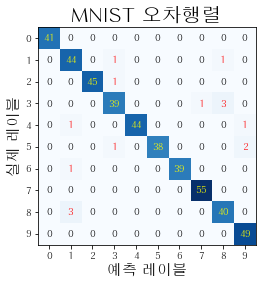

In [54]:
from matplotlib import font_manager, rc # h2gprm.ttf, uni_hsr.ttf
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/h2gprm.ttf").get_name()
rc('font', family=font_name)

plt.imshow(cmat, cmap='Blues')

plt.title('MNIST 오차행렬', fontsize=20)
plt.xlabel('예측 레이블', fontsize=15)
plt.ylabel('실제 레이블', fontsize=15)
plt.xticks(range(10))
plt.yticks(range(10))

for (i,j),v in np.ndenumerate(cmat):
    if v==0: plt.text(j,i,v,ha='center',va='center')
    elif v<30: plt.text(j,i,v,ha='center',va='center', color='red')
    else: plt.text(j,i,v,ha='center',va='center',color='yellow')